In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
import json
import seaborn as sns
from sklearn import linear_model
import sklearn as sk
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.formula.api import mixedlm
import statsmodels as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from scipy import stats as ss
from scipy import stats
import scipy.io as sio
from statsmodels import robust
%matplotlib inline

In [3]:
#get rid of scientific notation
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Demorgraphics

In [3]:
demographics = pd.read_csv('apathy-prescreen_raw/data_exp_8835-v5_questionnaire-zk38.csv', sep = ",")
#demographics.head(15)
# we asked them 7 questions in total

In [4]:
demographics = demographics[demographics['Question Key'] != 'BEGIN QUESTIONNAIRE']
demographics = demographics[demographics['Question Key'] != 'END QUESTIONNAIRE']
demographics['id'] = demographics['Participant Private ID']
demographics['question'] = demographics['Question Key']
demographics['response'] = demographics['Response']
demographics = demographics[['id', 'question', 'response']]

In [5]:
d = pd.pivot_table(demographics, index = 'id', columns = 'question', values = 'response', aggfunc='first')
d = d.reset_index()
d.columns= ['id','age', 'confirmation_1', 'confirmation_2', 'gender', 'gender_numeric','handedness', 'handedness_numeric', 'degree', 'degree_numeric']


In [6]:
d['age'].astype(float).mean()

31.7

In [7]:
d['age'].astype(float).std()

7.434627375364976

In [8]:
d.groupby('gender').nunique()

,id,age,confirmation_1,confirmation_2,gender,gender_numeric,handedness,handedness_numeric,degree,degree_numeric
gender,,,,,,,,,,
Female,4,4,1,1,1,1,1,1,2,2
Male,16,10,1,1,1,1,2,2,4,4


In [9]:
d.to_csv('apathy_dataset/demographics_apathy.csv', sep = ',', encoding='utf-8')

# Sound Check

In [10]:
# do a quick check for sound
sound = pd.read_csv('apathy-prescreen_raw/data_exp_8835-v5_task-jgum.csv', sep = ",")
sound = sound.replace('null', np.nan)
sound = sound.replace('nan', np.nan)

In [11]:
sound = sound[np.isfinite(sound['button pressed'])]

In [12]:
correct = [1, 0, 0]* 20

In [13]:
s = (sound['button pressed'] == correct).reset_index(name = 'check')
sound = sound.reset_index()
sound = pd.merge(s[['index', 'check']], sound, on = 'index')
sound_final= sound[['Participant Private ID','button pressed','check']]

In [6]:
pd.set_option('display.max_columns', 300)
pd.set_option('display.max_rows', None)
#sound_final.head(300)

# rod fixing count


In [4]:
df1 = pd.read_csv('apathy-prescreen_raw/data_exp_8835-v5_task-i9un.csv', sep = ",") # high to low
df2 = pd.read_csv('apathy-prescreen_raw/data_exp_8835-v5_task-d74y.csv', sep = ",") # low to high

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3044: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [7]:
df2.head(1)

,Event Index,UTC Timestamp,UTC Date,Local Timestamp,Local Timezone,Local Date,Experiment ID,Experiment Version,Tree Node Key,Repeat Key,Schedule ID,Participant Public ID,Participant Private ID,Participant Starting Group,Participant Status,Participant Completion Code,Participant External Session ID,Participant Device Type,Participant Device,Participant OS,Participant Browser,Participant Monitor Size,Participant Viewport Size,Checkpoint,Task Name,Task Version,randomiser-mgaa,checkpoint-z52s,checkpoint-u6nu,checkpoint-puaw,checkpoint-axcr,checkpoint-mrc4,branch-ult5,reaction time,key pressed,price_displayed,order,environment,round_instance,task,function id,rod fixing checked,builtin_rt,end_time,start_time,index
0,1,1562777693930.000,10/07/2019 16:54:53,1562777694588.000,1.000,10/07/2019 17:54:54,8835.000,5.000,task-d74y,nan,2796330.000,BLIND,774153.000,nan,complete,nan,5d2616a3c4d71e00190d081c,computer,Desktop or Laptop,Windows 10,Chrome 75.0.3770.100,1920x1080,1920x937,after questionnairs,New_Low to High with Rod Fixing,6.000,Low to High,after consent,after demographics,after training,after fishing,after questionnairs,AMI_accept,3083.000,32.000,nan,low-high,low,nan,NaN,instruction,nan,3082.805,1562777694586.000,1562777691503.000,0.000


In [16]:
#get rid of scientific notation
pd.set_option('display.float_format', lambda x: '%.3f' % x)

#replace all null and nan to the np.nan
df1 = df1.replace('null', np.nan)
df1 = df1.replace('nan', np.nan)
df2 = df2.replace('null', np.nan)
df2 = df2.replace('nan', np.nan)

#turn object into floats and round them and rename them
df1['end_time'] = round(df1['end_time'].astype(float))
df1['start_time'] = round(df1['start_time'].astype(float))
df1['builtin_rt'] = df1['builtin rt'].astype(float) #dont round up builtin reaction time
df1['quality_check'] = df1['rod fixing checked'].astype(float)
df1['id'] = df1['Participant Private ID']
df1['function_id'] = df1['function id']
df1['round_instance'] = df1['round instance']
df1['trial_index'] = df1['index']
df1['key_pressed'] = df1['key pressed']

df2['end_time'] = round(df2['end_time'].astype(float))
df2['start_time'] = round(df2['start_time'].astype(float))
df2['builtin_rt'] = df2['builtin_rt'].astype(float) #dont round up builtin reaction time
df2['quality_check'] = df2['rod fixing checked'].astype(float)
df2['id'] = df2['Participant Private ID']
df2['round_instance'] = df2['round_instance']
df2['function_id'] = df2['function id']
df2['trial_index'] = df2['index']
df2['key_pressed'] = df2['key pressed']

In [17]:
#select columns from df1 and df2
data1 = df1[['trial_index','id','price_displayed', 'key pressed','environment', 'order', 
           'round_instance', 'task', 'function_id', 'quality_check', 
           'builtin_rt', 'end_time', 'start_time', 'Participant Public ID', 'key_pressed']]
data2 = df2[['trial_index','id','price_displayed', 'key pressed','environment', 'order', 
           'round_instance', 'task', 'function_id', 'quality_check', 
           'builtin_rt', 'end_time', 'start_time', 'Participant Public ID', 'key_pressed']]

In [18]:
data1['order'] = ['high-low']*len(data1)
data2['order'] = ['low-high']*len(data2)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [19]:
data = pd.concat([data1, data2])
data.index.nunique()
index_manual = list(range(0, len(data)))
data['index'] = index_manual
data = data.set_index('index')
data = data[data.function_id != 'caller']
data = data[pd.notnull(data['function_id'])]

In [20]:
data_useful = data[(data.function_id == "rod_fixing")|(data.function_id == "fishing_l")|(data.function_id == "fishing_h")]
data_useful = data_useful.sort_values(by = ['id', 'start_time'])

In [21]:
data_useful['trial_label'] = data_useful[['trial_index', 'round_instance']].apply(lambda x: ' '.join(x.astype(str)), axis=1)


In [22]:
d = data_useful.groupby(['id', 'round_instance'])['start_time'].diff().shift(-1).reset_index(name = 'latency')
d = d.set_index('index')

In [23]:
data_useful['latency'] = d['latency']
data_useful= data_useful.sort_index().sort_values(['id', 'start_time'])
#data_useful.head(400)

In [24]:
data_rod = data_useful[(data_useful.function_id == "rod_fixing")]

In [25]:
by_environment = data_rod.groupby(['id', 'trial_label']).count().reset_index()
by_environment

,id,trial_label,trial_index,price_displayed,key pressed,environment,order,round_instance,task,function_id,quality_check,builtin_rt,end_time,start_time,Participant Public ID,key_pressed,latency
0,773858.000,11.0 11.0,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8
1,773858.000,11.0 12.0,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8
2,773858.000,11.0 21.0,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8
3,773858.000,11.0 22.0,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8
4,773858.000,3.0 11.0,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8
5,773858.000,3.0 12.0,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8
6,773858.000,4.0 21.0,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8
7,773858.000,4.0 22.0,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8
8,773858.000,7.0 11.0,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8
9,773858.000,7.0 12.0,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8


# Analysis

In [26]:
def mask_first(x):
    """
    get rid of the first spike by creating a mask of 0, 1, 1, 1, ...
    """
    result = np.ones_like(x)
    result[0] = 0
    return result

In [27]:
mask = data_useful.groupby(['id', 'price_displayed', 'trial_index'])['trial_index'].transform(mask_first).astype(bool)
data_useful = data_useful.loc[mask]


# Fishing data

In [30]:
data_fish = data_useful[(data_useful.function_id == "fishing_l")|(data_useful.function_id == "fishing_h")]

In [112]:
data_fish.to_csv('apathy_dataset/fish_prescreen_v2_20.csv', sep = ',', encoding='utf-8')

In [31]:
data_fish.groupby('environment')['latency'].mean()

environment
high   170.299
low    179.890
Name: latency, dtype: float64

# Rod fixing data

In [34]:
mask = data_rod.groupby(['id', 'trial_label'])['trial_label'].transform(mask_first).astype(bool)
data_rod = data_rod.loc[mask]

In [35]:
data_rod.to_csv('apathy_dataset/rod_prescreen_20_no_first_v2_spike.csv', sep = ',', encoding='utf-8')

# Questionnaire

In [37]:
def extract_choice(ser):
    choice = []
    for s in ser:
        c = 0
        while c < len(s):
            r = json.loads(s[c])
            for key in r.keys():
                choice.append(r[key])
            c = c + 1
    return choice

# AMI

In [39]:
# import AMI
AMI = pd.read_csv('apathy-prescreen_raw/data_exp_8835-v5_task-73dp.csv', sep = ",")
#AMI

In [40]:
AMI = AMI.replace('null', np.nan)
AMI = AMI.replace('nan', np.nan)

In [41]:
AMI_group = AMI.dropna(subset=['choice made'])
AMI_group = AMI_group.groupby(["Participant Private ID"])['choice made'].apply(list).reset_index()
AMI_group = AMI_group[~AMI_group["Participant Private ID"].isin([774133.0])]
choice = extract_choice(AMI_group['choice made'])


In [42]:
AMI_group = AMI_group.loc[AMI_group.index.repeat(19)] #repeat no of questions times

In [43]:
AMI_group['choice'] = choice
AMI_group['question_number'] = ["e1", "s2", "s3", "s4", 
                                "b5", "e6", "e7", "s8", 
                                "b9", "b10", "b11", "b12", 
                                "t13", "e14", "s15", "b16", 
                                "e17", "s18", "e19"]*19

In [44]:
AMI_group.choice[AMI_group.choice == "Completely UNTRUE"] = 4
AMI_group.choice[AMI_group.choice == "Mostly untrue"] = 3
AMI_group.choice[AMI_group.choice == "Neither true nor untrue"] = 2
AMI_group.choice[AMI_group.choice == "Quite true"] = 1
AMI_group.choice[AMI_group.choice == "Completely TRUE"] = 0

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-c

In [45]:
bAMI = AMI_group[(AMI_group.question_number == "b5")|(AMI_group.question_number == "b9")|
                 (AMI_group.question_number == "b10")|(AMI_group.question_number == "b11")|
                 (AMI_group.question_number == "b12")|(AMI_group.question_number == "b16")]
sAMI = AMI_group[(AMI_group.question_number == "s2")|(AMI_group.question_number == "s3")|
                 (AMI_group.question_number == "s4")|(AMI_group.question_number == "s8")|
                 (AMI_group.question_number == "s15")|(AMI_group.question_number == "s18")]
eAMI = AMI_group[(AMI_group.question_number == "e1")|(AMI_group.question_number == "e6")|
                 (AMI_group.question_number == "e7")|(AMI_group.question_number == "e14")|
                 (AMI_group.question_number == "e17")|(AMI_group.question_number == "e19")]
trick_AMI = AMI_group[(AMI_group.question_number == "t13")]

In [46]:
bAMI = bAMI.groupby(['Participant Private ID'])['choice'].sum().reset_index()
bAMI.columns = ['id', 'bAMI']
bAMI['score'] = bAMI['bAMI']/6
sAMI = sAMI.groupby(['Participant Private ID'])['choice'].sum().reset_index()
sAMI.columns = ['id', 'sAMI']
sAMI['score'] = sAMI['sAMI']/6
eAMI = eAMI.groupby(['Participant Private ID'])['choice'].sum().reset_index()
eAMI.columns = ['id', 'eAMI']
eAMI['score'] = eAMI['eAMI']/6
AMI_final = {'id': bAMI['id'], 'bAMI': bAMI['score'], 'sAMI': sAMI['score'], 'eAMI': eAMI['score']}
AMI_final = pd.DataFrame(data=AMI_final)
AMI_final['tAMI'] = (bAMI['score'] + sAMI['score'] + eAMI['score'])/3

In [47]:
(AMI_final['bAMI']).describe()

count   19.000
mean     2.211
std      0.743
min      1.000
25%      1.667
50%      2.167
75%      2.750
max      3.667
Name: bAMI, dtype: float64

In [48]:
2.21 + 0.743 + 0.743

3.6959999999999997

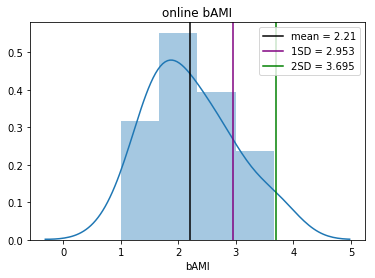

In [49]:
sns.distplot(AMI_final['bAMI'])
plt.title('online bAMI')
plt.axvline(x = 2.21, color = 'black', label = 'mean = 2.21')
plt.axvline(x = 2.953, color = 'purple', label = '1SD = 2.953')
plt.axvline(x = 3.695, color = 'green', label = '2SD = 3.695')
plt.legend(loc = 1)
plt.savefig('figure/prescreen/online_bAMI_v2.png', dpi = 300)

In [50]:
AMI_final.head(20)

,id,bAMI,sAMI,eAMI,tAMI
0,773858.000,1.833,2.167,1.667,1.889
1,773951.000,2.833,2.167,2.167,2.389
2,774153.000,1.500,2.500,2.000,2.000
3,774164.000,2.000,2.333,2.500,2.278
4,774222.000,2.167,2.000,1.667,1.944
5,774240.000,1.000,1.500,3.500,2.000
6,774245.000,1.500,2.833,2.833,2.389
7,774256.000,2.333,3.500,1.000,2.278
8,774543.000,1.500,2.833,1.500,1.944
9,774545.000,2.167,2.833,0.833,1.944


# HADS

In [51]:
# import HADS
HADS = pd.read_csv('apathy-prescreen_raw/data_exp_8835-v5_task-w8es.csv', sep = ",")
HADS.drop(HADS.tail(1).index,inplace=True)

In [52]:
HADS_group = HADS.groupby(["Participant Private ID"])['choice made'].apply(list).reset_index()
choice = extract_choice(HADS_group['choice made'])
HADS_group = HADS_group.loc[HADS_group.index.repeat(15)]

In [53]:
HADS_group['choice'] = choice
HADS_group['question_number'] = ["a1", "d2", "d3", "a4", 
                                 "a5", "d6", "d7", "a8", 
                                 "a9", "d10", "d11", "t12", 
                                 "a13", "a14", "d15"]*20

In [54]:
HADS_group['scale'] = [{"Most of the time" : 3, "A lot of the time": 2, "From time to time, occasionally" : 1, "Not at all":0},
                      {"Nearly all the time": 3, "Very often": 2, "Sometimes": 1, "Not at all":0},
                      {"Definitely as much":0, "Not quite so much":1, "Only a little":2, "Hardly at all":3},
                      {"Not at all":0, "Occasionally":1, "Quite Often":2, "Very Often":3},
                      {"Very definitely and quite badly":3, "Yes, but not too badly":2, "A little, but it doesn't worry me":1, "Not at all":0},
                      {"Definitely":3, "I don't take as much care as I should":2,"I may not take quite as much care":1, "I take just as much care as ever":0},
                      {"As much as I always could":0, "Not quite so much now":1, "Definitely not so much now":2, "Not at all":3},
                      {"Very much indeed":3, "Quite a lot":2,"Not very much":1, "Not at all":0},
                      {"A great deal of the time":3, "A lot of the time":2, "From time to time, but not too often":1,"Only occasionally":0},
                      {"As much as I ever did":0, "Rather less than I used to":1, "Definitely less than I used to":2, "Hardly at all":3},
                      {"Not at all":3, "Not often":2,"Sometimes":1, "Most of the time":0},
                      {"Not at all":3, "Not often":2,"Sometimes":1, "Most of the time":0},
                      {"Very often indeed":3, "Quite often":2,"Not very often":1, "Not at all":0},
                      {"Definitely":0, "Usually":1, "Not Often":2,"Not at all":3},
                      {"Often":0, "Sometimes":1,"Not often":2, "Very seldom":3}]*20

In [55]:
value = []
for index, row in HADS_group.iterrows():
    d = row["scale"]
    k = row['choice']
    value.append(d[k])
HADS_group['value'] = value

depression = HADS_group[(HADS_group.question_number == "d2")|(HADS_group.question_number == "d3")|
                        (HADS_group.question_number == "d6")|(HADS_group.question_number == "d7")|
                        (HADS_group.question_number == "d10")|(HADS_group.question_number == "d11")|
                        (HADS_group.question_number == "d15")]
anxiety = HADS_group[(HADS_group.question_number == "a1")|(HADS_group.question_number == "a4")|
                     (HADS_group.question_number == "a5")|(HADS_group.question_number == "a8")|
                     (HADS_group.question_number == "a9")|(HADS_group.question_number == "a13")|
                     (HADS_group.question_number == "a14")]
trick = HADS_group[(HADS_group.question_number == "t12")]

In [56]:
depression = depression.groupby(['Participant Private ID'])['value'].sum().reset_index()
depression.columns = ['id', 'depression']
anxiety = anxiety.groupby(['Participant Private ID'])['value'].sum().reset_index()
anxiety.columns = ['id', 'anxiety']

In [57]:
HADS_final = {'id': anxiety['id'], 'anxiety': anxiety['anxiety'], 'depression': depression['depression']}
HADS_final = pd.DataFrame(data=HADS_final)
HADS_final['tHADS'] = anxiety['anxiety'] + depression['depression']

In [58]:
(HADS_final).describe()

,id,anxiety,depression,tHADS
count,20.000,20.000,20.000,20.000
mean,774378.550,6.500,5.000,11.500
std,244.315,4.072,3.494,6.755
min,773858.000,0.000,0.000,1.000
25%,774207.500,3.750,2.750,7.750
50%,774544.000,7.000,5.500,10.500
75%,774569.500,8.500,6.250,16.000
max,774645.000,14.000,16.000,30.000


In [59]:
	11.50 + 6.755 + 6.755

25.009999999999998

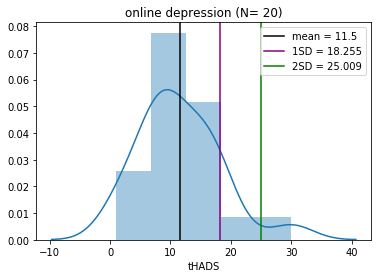

In [60]:
sns.distplot(HADS_final['tHADS'])
plt.title('online depression (N= 20)')
plt.axvline(x = 11.5, color = 'black', label = 'mean = 11.5')
plt.axvline(x = 18.255, color = 'purple', label = '1SD = 18.255')
plt.axvline(x = 25.009, color = 'green', label = '2SD = 25.009')
plt.legend(loc = 1)

# Pleasure

In [62]:
# import pleasure
pleasure = pd.read_csv('apathy-prescreen_raw/data_exp_8835-v5_task-uvof.csv', sep = ",")
pleasure.drop(pleasure.tail(1).index,inplace=True)

In [63]:
pleasure_group = pleasure.groupby(["Participant Private ID"])['choice made'].apply(list).reset_index()
choice = extract_choice(pleasure_group['choice made'])
pleasure_group = pleasure_group.loc[pleasure_group.index.repeat(15)]

In [64]:
pleasure_group['choice'] = choice
pleasure_group['question_number'] = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]*20

In [65]:
pleasure_group.choice[pleasure_group.choice == "Strongly agree"] = 1
pleasure_group.choice[pleasure_group.choice == "Agree"] = 2
pleasure_group.choice[pleasure_group.choice == "Disagree"] = 3
pleasure_group.choice[pleasure_group.choice == "Strongly disagree"] = 4

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-c

In [66]:
pleasure_final = {'id': pleasure_group['Participant Private ID']}
pleasure_final = pd.DataFrame(data=pleasure_final)
p = pleasure_group.groupby('Participant Private ID')['choice'].sum().reset_index(name = 'total')
pleasure_final['pleasure'] = p['total']
pleasure_final=pleasure_final.drop_duplicates()
len(pleasure_final)

20

# Fatigue

In [67]:
# import fatigue
fatigue = pd.read_csv('apathy-prescreen_raw/data_exp_8835-v5_task-j95b.csv', sep = ",")
fatigue.drop(fatigue.tail(1).index,inplace=True)

In [68]:
fatigue_group = fatigue.groupby(["Participant Private ID"])['choice made'].apply(list).reset_index()
choice_fatigue= extract_choice(fatigue_group['choice made'])
fatigue_group = fatigue_group.loc[fatigue_group.index.repeat(22)]

In [69]:
fatigue_group['choice'] = choice_fatigue
fatigue_group['question_number'] = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
                                  19, 20, 21,22]*20

In [70]:
# 'Never', 'Rarely', 'Sometimes', 'Often', 'Almost always'
#   0         1          2            3           4
fatigue_group.choice[fatigue_group.choice == "Never"] = 0
fatigue_group.choice[fatigue_group.choice == "Rarely"] = 1
fatigue_group.choice[fatigue_group.choice == "Sometimes"] = 2
fatigue_group.choice[fatigue_group.choice == "Often"] = 3
fatigue_group.choice[fatigue_group.choice == "Almost always"] = 4

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pand

In [71]:
fatigue_physical = fatigue_group[fatigue_group['question_number'].isin([4, 7, 8, 11, 14, 15, 18, 21, 22])]
fatigue_cognitive = fatigue_group[fatigue_group['question_number'].isin([1, 2, 3, 6, 12, 13, 16, 17, 19, 20])]
fatigue_psychological = fatigue_group[fatigue_group['question_number'].isin([9, 10])]
fatigue_trick = fatigue_group[fatigue_group['question_number'].isin([5])]

In [72]:
physical = fatigue_physical.groupby(['Participant Private ID'])['choice'].sum().reset_index()
physical.columns = ['id', 'physical']
cognitive = fatigue_cognitive.groupby(['Participant Private ID'])['choice'].sum().reset_index()
cognitive.columns = ['id', 'cognitive']
psychological = fatigue_psychological.groupby(['Participant Private ID'])['choice'].sum().reset_index()
psychological.columns = ['id', 'psychological']

In [73]:
fatigue_final = {'id': physical['id'], 'physical': physical['physical'], 
                'cognitive': cognitive['cognitive'],
               'psychological': psychological['psychological']}
fatigue_final = pd.DataFrame(data=fatigue_final)
fatigue_final['fatigue'] = fatigue_final['physical'] + fatigue_final['cognitive'] + fatigue_final['psychological']

# Barratt

In [74]:
# import Baratt
barrat = pd.read_csv('apathy-prescreen_raw/data_exp_8835-v5_task-df75.csv', sep = ",")
barrat.drop(barrat.tail(1).index,inplace=True)

In [75]:
barrat_group = barrat.groupby(["Participant Private ID"])['choice made'].apply(list).reset_index()
choice = extract_choice(barrat_group['choice made'])
barrat_group = barrat_group.loc[barrat_group.index.repeat(31)]

In [76]:
barrat_group['choice'] = choice
barrat_group['question_number'] = ["att1", "mo2", "mo3", "mo4", "att5", "cogin6", 
                                   "con7", "con8", "att9", "cogcom10", "att11", "t12",
                                   "con13", "con14", "con15", "cogcom16", "per17", 
                                   "mo18","cogcom19", "mo20", "att21","per22",
                                   "mo23", "per24", "cogin25", "mo26", "cogin27", 
                                   "cogcom28", "att29", "cogcom30", "per31"]*20

In [77]:
barrat_group = barrat_group[barrat_group['question_number'].isin(["att5","att11","att29", 
                                                                  "cogin6", "cogin25", "cogin27", 
                                                                  "mo2", "mo3", "mo4", "mo18",
                                                                  "mo20", "mo23", "mo26", 
                                                                  "per17","per22","per24",
                                                                  "con15", "cogcom19", "att29"])]
barrat_group.choice[barrat_group.choice == "Rarely/Never"] = 1
barrat_group.choice[barrat_group.choice == "Occasionally"] = 2
barrat_group.choice[barrat_group.choice == "Often"] = 3
barrat_group.choice[barrat_group.choice == "Almost always/Always"] = 4

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the C

In [78]:
reverse_barrat = barrat_group[barrat_group['question_number'].isin(["att9", "att21","per31", 
                                                                    "att1", "con7", "con8", 
                                                                    "con13", "con14", "cogcom10", 
                                                                    "cogcom16","cogcom30"])]
reverse_barrat.choice[reverse_barrat.choice == "Rarely/Never"] = 4
reverse_barrat.choice[reverse_barrat.choice == "Occasionally"] = 3
reverse_barrat.choice[reverse_barrat.choice == "Often"] = 2
reverse_barrat.choice[reverse_barrat.choice == "Almost always/Always"] = 1

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/core/generic.py:8682: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3291: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-vers

In [79]:
attention = barrat_group[(barrat_group.question_number == "att5")|(barrat_group.question_number == "att9")|
                         (barrat_group.question_number == "att11")|(barrat_group.question_number == "att21")|
                         (barrat_group.question_number == "att29")]
cognitive_instable = barrat_group[(barrat_group.question_number == "cogin6")|(barrat_group.question_number == "cogin25")|
                                  (barrat_group.question_number == "cogin27")]
motor = barrat_group[(barrat_group.question_number == "mo2")|(barrat_group.question_number == "mo3")|
                     (barrat_group.question_number == "mo4")|(barrat_group.question_number == "mo18")|
                     (barrat_group.question_number == "mo20")|(barrat_group.question_number == "mo23")|
                     (barrat_group.question_number == "mo26")]
perseverance = barrat_group[(barrat_group.question_number == "per17")|(barrat_group .question_number == "per22")|
                            (barrat_group.question_number == "per24")|(barrat_group.question_number == "per31")]
self_control = barrat_group[(barrat_group.question_number == "con1")|(barrat_group.question_number == "con7")|
                            (barrat_group.question_number == "con8")|(barrat_group.question_number == "con13")|
                            (barrat_group.question_number == "con14")|(barrat_group.question_number == "con15")]
cognitive_complexity = barrat_group[(barrat_group.question_number == "cogcom10")|(barrat_group.question_number == "cogcom16")|
                                    (barrat_group.question_number == "cogcom19")|(barrat_group.question_number == "cogcom28")|
                                    (barrat_group.question_number == "cogcom30")]
trick = barrat_group[barrat_group.question_number == "t12"]

In [80]:
attention = attention.groupby(['Participant Private ID'])['choice'].sum().reset_index()
attention.columns = ['id', 'attention']
cognitive_instable = cognitive_instable.groupby(['Participant Private ID'])['choice'].sum().reset_index()
cognitive_instable.columns = ['id', 'cognitive_instable']
motor = motor.groupby(['Participant Private ID'])['choice'].sum().reset_index()
motor.columns = ['id', 'motor']
perseverance = perseverance.groupby(['Participant Private ID'])['choice'].sum().reset_index()
perseverance.columns = ['id', 'perseverance']
self_control = self_control.groupby(['Participant Private ID'])['choice'].sum().reset_index()
self_control.columns = ['id', 'self_control']
cognitive_complexity = cognitive_complexity.groupby(['Participant Private ID'])['choice'].sum().reset_index()
cognitive_complexity.columns = ['id', 'cognitive_complexity']

In [81]:
barrat_final = {'id': attention['id'], 'attention': attention['attention'], 
                'cognitive_instable': cognitive_instable['cognitive_instable'],
               'motor': motor['motor'],
               'perseverance': perseverance['perseverance'],
               'self_control': self_control['self_control'],
               'cognitive_complexity': cognitive_complexity['cognitive_complexity']}
barrat_final = pd.DataFrame(data=barrat_final)
barrat_final['attentional'] = attention['attention'] + cognitive_instable['cognitive_instable']
barrat_final['motor_0'] = motor['motor'] + perseverance['perseverance']
barrat_final['nonplanning'] = self_control['self_control'] + cognitive_complexity['cognitive_complexity']
barrat_final['impulsivity'] = barrat_final['attentional'] + barrat_final['motor_0'] + barrat_final['nonplanning']

## Into one giant table

In [82]:
scale = pd.merge(AMI_final, HADS_final, on = ['id'], how = 'inner')

In [83]:
scale = pd.merge(scale, fatigue_final, on = ['id'], how = 'inner')

In [84]:
scale = pd.merge(scale, pleasure_final, on = ['id'], how = 'inner')

In [85]:
scale = pd.merge(scale, barrat_final, on = ['id'], how = 'inner')

In [113]:
scale.to_csv('apathy_dataset/scale_fisherman2_prescreen.csv', sep = ',', encoding='utf-8')

# Visualization

In [87]:
graph = data_fish.groupby(["price_displayed", "function_id"])['latency'].mean().reset_index()
graph.columns = ['price_displayed', 'function_id', 'average_latency']

In [88]:
price = [0.1, 0.4, 1, 2.5,  5.1, 6. ]
latency_l = graph.average_latency[(graph.function_id == 'fishing_l')]
latency_h = graph.average_latency[(graph.function_id == 'fishing_h')]

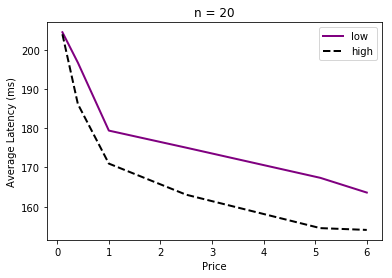

In [89]:
plt.plot( price, latency_l, marker='', color='purple', linewidth=2, label = "low")
plt.plot( price, latency_h, marker='', color='black', linewidth=2, linestyle='dashed', label="high")
plt.title("n = 20")
plt.xlabel("Price")
plt.ylabel("Average Latency (ms)")
plt.legend()
plt.savefig('figure/prescreen/v2.0_price_latency.png', transparent=True, dpi=300)

# Linear Mixed Model

In [90]:
fish = data_fish

In [91]:
fish['tap_count']=[1]*len(fish)
# fatigue per environment

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [92]:
tap = fish.groupby(['id', 'environment'])['tap_count'].cumsum().reset_index(name = 'fatigue')

In [93]:
tap = tap.reset_index().set_index('index')
tap = tap.drop('level_0', axis =1)

In [94]:
fish = tap.merge(fish, left_index = True, right_index=True,how='inner')

In [95]:
fish['environment_binary'] = np.where(fish['environment']=='low', 0, fish['environment'])
fish['environment_binary'] = np.where(fish['environment']=='high', 1, fish['environment'])
fish['environment_binary'] = np.where(fish['environment']=='low', 0, fish['environment_binary'])
fish['environment_binary'] = np.where(fish['environment']=='high', 1, fish['environment_binary'])
fish['log_latency'] = np.log(fish['latency'])

In [96]:
plot = fish.groupby(['id', 'price_displayed', 'environment'])['latency'].mean().reset_index(name = 'average_latency')


<Figure size 7200x8640 with 0 Axes>

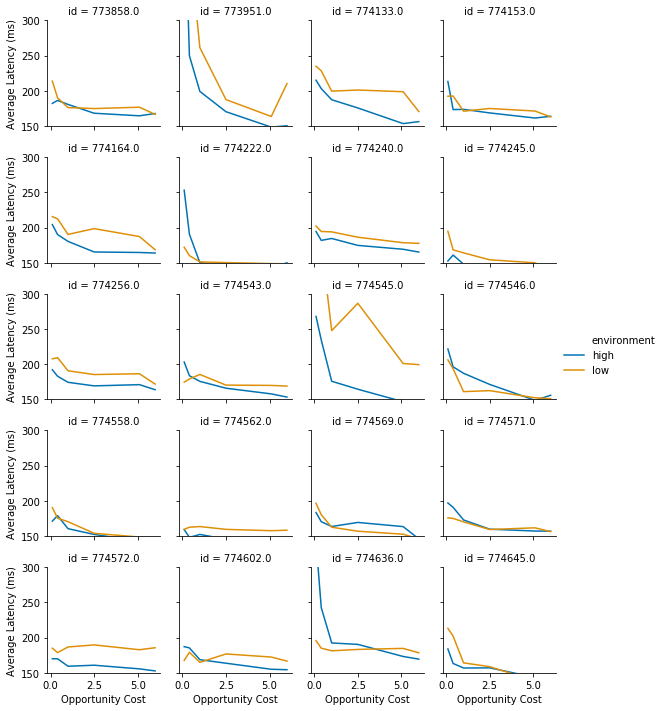

In [98]:
plt.figure(figsize=(100,120))
g = sns.FacetGrid(plot, col="id", col_wrap=4, height=2, ylim=(150, 300))
g.map(sns.lineplot,'price_displayed','average_latency', 'environment', palette = "colorblind", legend = 'full',
      err_style="bars")
g.add_legend()
g.set_axis_labels('Opportunity Cost', 'Average Latency (ms)')
plt.savefig('figure/prescreen/By subject price and latency.png', dpi = 600, transparent = True)


In [99]:
fish.isnull().sum()
fish = fish[fish.latency.notnull()]

In [100]:
f_model = mixedlm(formula = 'log_latency ~ 1 + price_displayed + environment_binary + fatigue',
                  groups = fish['id'],
                  re_formula = "~1 + price_displayed + environment_binary + fatigue + price_displayed*environment_binary",
                  data = fish)

r = f_model.fit(reml = False, method = 'powell')


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/regression/mixed_linear_model.py:2094: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


In [101]:
print (r.summary())

                                      Mixed Linear Model Regression Results
Model:                                MixedLM                   Dependent Variable:                   log_latency
No. Observations:                     68381                     Method:                               ML         
No. Groups:                           20                        Scale:                                0.0508     
Min. group size:                      2722                      Likelihood:                           4628.9266  
Max. group size:                      3951                      Converged:                            Yes        
Mean group size:                      3419.1                                                                     
-----------------------------------------------------------------------------------------------------------------
                                                                      Coef.  Std.Err.    z    P>|z| [0.025 0.975]
------------

In [102]:
r_params = pd.DataFrame(r.params,columns=['LMM'])
random_effects = pd.DataFrame(r.random_effects)
random_effects = random_effects.transpose()
random_effects = random_effects.rename(index=str, columns={'groups': 'LMM'})

In [104]:
random_effects.describe()

,Group,environment_binary[T.1],price_displayed,price_displayed:environment_binary[T.1],fatigue
count,20.000,20.000,20.000,20.000,20.000
mean,-0.014,0.019,0.003,-0.003,-0.000
std,0.211,0.150,0.032,0.022,0.000
min,-0.221,-0.455,-0.081,-0.054,-0.000
25%,-0.118,-0.038,-0.004,-0.014,-0.000
50%,-0.093,0.013,0.009,-0.001,0.000
75%,0.005,0.111,0.026,0.010,0.000
max,0.594,0.314,0.036,0.038,0.000


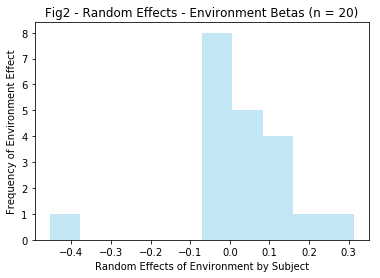

In [105]:
x = random_effects['environment_binary[T.1]']
plt.hist(x, alpha=0.5, label='x', color = 'skyblue')
plt.title('Fig2 - Random Effects - Environment Betas (n = 20)')
plt.xlabel('Random Effects of Environment by Subject')
plt.ylabel('Frequency of Environment Effect')
plt.savefig('environment_beta_29.png', transparent=True, dpi=300)

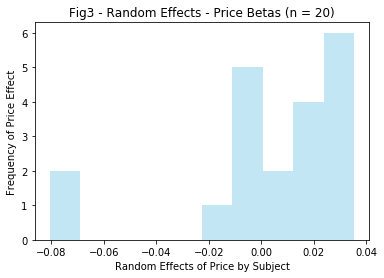

In [106]:
x = random_effects['price_displayed']
plt.hist(x, alpha=0.5, label='x', color = 'skyblue')
plt.title('Fig3 - Random Effects - Price Betas (n = 20)')
plt.xlabel('Random Effects of Price by Subject')
plt.ylabel('Frequency of Price Effect')
plt.savefig('price_beta_29.png', transparent=True, dpi=300)

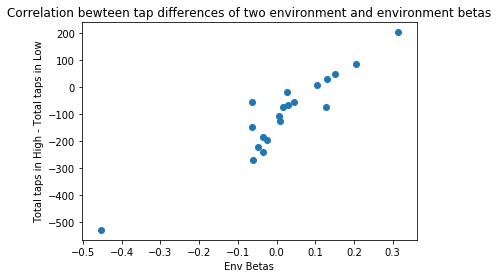

In [107]:
tap = data_fish.groupby(['id', 'environment'])['tap_count'].sum().reset_index(name = 'difference')
tap = tap.groupby(tap.index//2)['difference'].diff(-1).dropna().reset_index()

y = -1*tap['difference']
x = random_effects['environment_binary[T.1]']
plt.title('Correlation bewteen tap differences of two environment and environment betas')
plt.xlabel('Env Betas')
plt.ylabel('Total taps in High - Total taps in Low')
plt.scatter(x, y)

In [108]:
f_model = mixedlm(formula = 'log_latency ~ 1 + price_displayed + environment_binary + fatigue',
                  groups = fish['id'],
                  re_formula = "~1 + price_displayed + environment_binary + fatigue",
                  data = fish)

r = f_model.fit(reml = False, method = 'powell')

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/regression/mixed_linear_model.py:2094: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


In [109]:
print (r.summary())

                          Mixed Linear Model Regression Results
Model:                        MixedLM           Dependent Variable:           log_latency
No. Observations:             68381             Method:                       ML         
No. Groups:                   20                Scale:                        0.0514     
Min. group size:              2722              Likelihood:                   4253.4240  
Max. group size:              3951              Converged:                    Yes        
Mean group size:              3419.1                                                     
-----------------------------------------------------------------------------------------
                                              Coef.  Std.Err.    z    P>|z| [0.025 0.975]
-----------------------------------------------------------------------------------------
Intercept                                      5.216    0.043 121.248 0.000  5.132  5.301
environment_binary[T.1]             

In [110]:
r_params = pd.DataFrame(r.params,columns=['LMM'])
random_effects = pd.DataFrame(r.random_effects)
random_effects = random_effects.transpose()
random_effects = random_effects.rename(index=str, columns={'groups': 'LMM'})

In [111]:
random_effects.head(2)

,Group,environment_binary[T.1],price_displayed,fatigue
773858.0,-0.042,0.033,0.009,0.000
773951.0,0.502,-0.040,-0.077,-0.000


# Correlation with scales

In [195]:
AMI_final['id']=AMI_final['id'].astype('str')

In [196]:
AMI_final = AMI_final.reset_index().set_index('id')

In [197]:
HADS_final['id']=HADS_final['id'].astype('str')

In [198]:
AMI_final= AMI_final[['bAMI', 'sAMI', 'eAMI', 'tAMI']]

In [199]:
HADS_final = HADS_final.reset_index().set_index('id')

In [200]:
HADS_final = HADS_final[['anxiety', 'depression', 'tHADS']]

In [205]:
correlation_table = correlation_table.merge(HADS_final, left_index=True, right_index=True, how='inner')

In [202]:
correlation_table = AMI_final.merge(random_effects, left_index=True, right_index=True, how = 'inner')

In [206]:
correlation_table

,bAMI,sAMI,eAMI,tAMI,Group,environment_binary[T.1],price_displayed,fatigue,anxiety,depression,tHADS
773858.0,1.833,2.167,1.667,1.889,-0.042,0.033,0.009,0.000,13,6,19
773951.0,2.833,2.167,2.167,2.389,0.502,-0.040,-0.077,-0.000,5,2,7
774153.0,1.500,2.500,2.000,2.000,-0.101,0.031,0.023,0.000,7,4,11
774164.0,2.000,2.333,2.500,2.278,0.080,-0.037,0.005,-0.000,7,7,14
774222.0,2.167,2.000,1.667,1.944,-0.168,0.105,0.002,-0.000,8,8,16
774240.0,1.000,1.500,3.500,2.000,0.010,0.003,0.015,0.000,2,2,4
774245.0,1.500,2.833,2.833,2.389,-0.109,-0.027,0.006,-0.000,3,7,10
774256.0,2.333,3.500,1.000,2.278,0.037,-0.025,0.013,-0.000,12,6,18
774543.0,1.500,2.833,1.500,1.944,-0.057,0.039,0.015,-0.000,1,7,8
774545.0,2.167,2.833,0.833,1.944,0.537,-0.351,-0.054,0.000,7,1,8


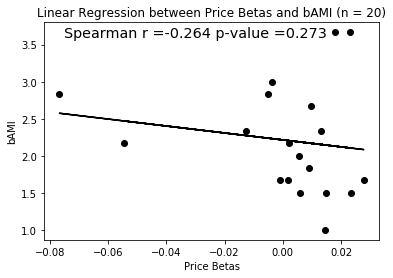

In [128]:
x = correlation_table['price_displayed']
y = correlation_table['bAMI']

slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
line = slope*x+intercept

plt.xlabel("Price Betas")
plt.ylabel("bAMI")

plt.plot(x,y,'o',x,line,color = 'black')
plt.title('Linear Regression between Price Betas and bAMI (n = 20)')
plt.annotate('Spearman r =-0.264 p-value =0.273', xy=(0.06, 0.93), xycoords='axes fraction', size = 'x-large')

plt.savefig('price_bAMI_v2.0.png', transparent=True, dpi=300)
#plt.scatter(x, y, linewidth=2, color='purple', linestyle='-', marker='o', label="y=x^2")

In [127]:
ss.spearmanr(x,y)

SpearmanrResult(correlation=-0.26455396763555317, pvalue=0.27372473101882455)

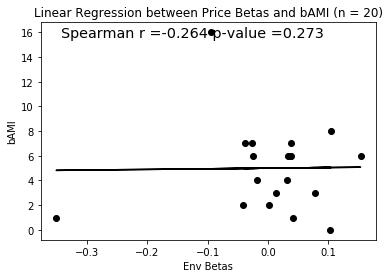

In [207]:
x = correlation_table['environment_binary[T.1]']
y = correlation_table['depression']

slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
line = slope*x+intercept

plt.xlabel("Env Betas")
plt.ylabel("bAMI")

plt.plot(x,y,'o',x,line,color = 'black')
plt.title('Linear Regression between Price Betas and bAMI (n = 20)')
plt.annotate('Spearman r =-0.264 p-value =0.273', xy=(0.06, 0.93), xycoords='axes fraction', size = 'x-large')

plt.savefig('price_bAMI_v2.0.png', transparent=True, dpi=300)
#plt.scatter(x, y, linewidth=2, color='purple', linestyle='-', marker='o', label="y=x^2")

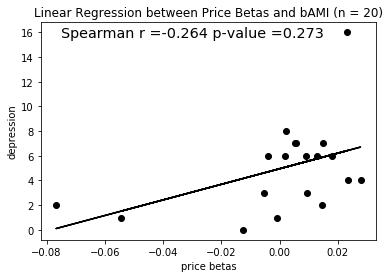

In [211]:
x = correlation_table['price_displayed']
y = correlation_table['depression']

slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
line = slope*x+intercept

plt.xlabel("price betas")
plt.ylabel("depression")

plt.plot(x,y,'o',x,line,color = 'black')
plt.title('Linear Regression between Price Betas and bAMI (n = 20)')
plt.annotate('Spearman r =-0.264 p-value =0.273', xy=(0.06, 0.93), xycoords='axes fraction', size = 'x-large')

plt.savefig('price_bAMI_v2.0.png', transparent=True, dpi=300)
#plt.scatter(x, y, linewidth=2, color='purple', linestyle='-', marker='o', label="y=x^2")

In [212]:
ss.spearmanr(x,y)

SpearmanrResult(correlation=0.43342604276277125, pvalue=0.06376307204232189)

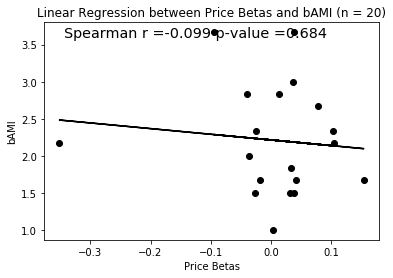

In [131]:
x = correlation_table['environment_binary[T.1]']
y = correlation_table['bAMI']

slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
line = slope*x+intercept

plt.xlabel("Price Betas")
plt.ylabel("bAMI")

plt.plot(x,y,'o',x,line,color = 'black')
plt.title('Linear Regression between Price Betas and bAMI (n = 20)')
plt.annotate('Spearman r =-0.099 p-value =0.684', xy=(0.06, 0.93), xycoords='axes fraction', size = 'x-large')

plt.savefig('price_bAMI_v2.0.png', transparent=True, dpi=300)
#plt.scatter(x, y, linewidth=2, color='purple', linestyle='-', marker='o', label="y=x^2")

In [130]:
ss.spearmanr(x,y)

SpearmanrResult(correlation=-0.09964866114272504, pvalue=0.6848284870943027)

In [134]:
correlation_table.reset_index(inplace = True)

In [135]:
correlation_table.head(2)

,index,bAMI,sAMI,eAMI,tAMI,Group,environment_binary[T.1],price_displayed,fatigue
0,773858.0,1.833,2.167,1.667,1.889,-0.042,0.033,0.009,0.000
1,773951.0,2.833,2.167,2.167,2.389,0.502,-0.040,-0.077,-0.000


In [136]:
id_noprescreen = ['765957.0', '765963.0', '765965.0', '765970.0', '765973.0', '765978.0',
       '765982.0', '765983.0', '765985.0', '765987.0', '765991.0', '765992.0',
       '765993.0', '765995.0', '766000.0', '766002.0', '766004.0', '766005.0',
       '766092.0', '766229.0']

In [137]:
bami_noprescreen = [1.0,
 2.0,
 2.0,
 1.6666666666666667,
 1.8333333333333333,
 0.5,
 0.8333333333333334,
 0.5,
 1.8333333333333333,
 1.0,
 1.5,
 2.5,
 1.5,
 1.0,
 1.8333333333333333,
 1.0,
 1.1666666666666667,
 1.1666666666666667,
 1.3333333333333333,
 1.5]

In [138]:
price_noprescreen = [-0.004410738537114685,
 -0.0025019339462890103,
 -0.012980405703397495,
 0.002729292372831921,
 0.017327754090753492,
 0.01915672650522167,
 0.017021878290115023,
 -0.0025896228022536357,
 0.008876186061994081,
 -0.0006193099687600645,
 0.014163532770973736,
 0.014977912937094932,
 -0.002325137916257332,
 0.01991996386124653,
 -0.01820087115888852,
 0.0025681009584446277,
 -0.007163627986727141,
 -0.012383485862305853,
 0.011445248926637407,
 -0.06501146289319781]

In [139]:
env_noprescreen = [0.009771229004375569,
 -0.25010784235208255,
 -0.010289310669443698,
 0.028209543279619276,
 0.07946221632179686,
 -0.10992243218765083,
 0.08602964648973652,
 0.056244109249018195,
 -0.02380766263956805,
 0.07110453317896502,
 -0.02835226875372859,
 0.16388961575810723,
 0.10294587334799882,
 -0.011944481482567298,
 -0.06488095506135855,
 -0.007770853922727611,
 0.040896810352790525,
 0.014132542574186252,
 -0.0388868034511856,
 -0.10672350903603803]

In [140]:
fatigue_noprescreen = [-5.271189104990437e-05,
 9.431439743360008e-06,
 3.1494183735698706e-06,
 2.689367661343853e-05,
 2.3619746074658117e-05,
 -2.134458416043379e-05,
 -5.246928903806269e-05,
 1.4704304350655941e-06,
 -3.7354754506646684e-05,
 -4.581067882986926e-05,
 9.996953876706738e-05,
 5.7648475695404414e-05,
 -3.1328711176249505e-06,
 4.8530121077986136e-05,
 -6.823593020477138e-05,
 1.3463476707518074e-05,
 -5.4700308178335554e-05,
 -1.9545925708494783e-05,
 3.0290135452370823e-05,
 4.083977385383334e-05]

In [141]:
group_noprescreen = [0.04503343093655941,
 0.1960914159911363,
 0.03653853864062738,
 0.03494509853700606,
 -0.058765569041928006,
 0.08893178986130476,
 -0.06152089845931549,
 -0.12069750288759663,
 0.0409787007104951,
 -0.17724961108853582,
 -0.024717903268194737,
 -0.1211615450525841,
 -0.05622979820808567,
 -0.13298923168833648,
 0.1303294194412854,
 0.17603596948270314,
 0.08937603281339554,
 -0.19812976565317714,
 0.017184059058016204,
 0.09601736987637968]

In [142]:
sami_noprescreen = [1.6666666666666667,
 1.5,
 1.6666666666666667,
 1.6666666666666667,
 2.0,
 0.8333333333333334,
 1.3333333333333333,
 0.16666666666666666,
 2.6666666666666665,
 0.5,
 2.6666666666666665,
 1.8333333333333333,
 1.8333333333333333,
 1.6666666666666667,
 2.0,
 2.1666666666666665,
 3.0,
 1.6666666666666667,
 1.5,
 2.1666666666666665]

In [143]:
tami_noprescreen = [1.277777777777778,
 1.7777777777777777,
 1.7222222222222223,
 1.388888888888889,
 1.5,
 0.7777777777777778,
 1.0555555555555556,
 0.27777777777777773,
 1.9444444444444444,
 1.111111111111111,
 2.1111111111111107,
 1.722222222222222,
 1.5555555555555554,
 1.3333333333333333,
 1.5,
 1.5,
 1.777777777777778,
 1.6666666666666667,
 1.2777777777777777,
 1.4444444444444444]

In [144]:
eami_noprescreen = [1.1666666666666667,
 1.8333333333333333,
 1.5,
 0.8333333333333334,
 0.6666666666666666,
 1.0,
 1.0,
 0.16666666666666666,
 1.3333333333333333,
 1.8333333333333333,
 2.1666666666666665,
 0.8333333333333334,
 1.3333333333333333,
 1.3333333333333333,
 0.6666666666666666,
 1.3333333333333333,
 1.1666666666666667,
 2.1666666666666665,
 1.0,
 0.6666666666666666]

In [145]:
d = {'index': id_noprescreen, 'bAMI': bami_noprescreen, 'sAMI': sami_noprescreen,
    'eAMI': eami_noprescreen, 'tAMI': tami_noprescreen, 'Group':group_noprescreen, 
    'environment_binary[T.1]': env_noprescreen, 'price_displayed': price_noprescreen,
    'fatigue': fatigue_noprescreen}
noprescreen = pd.DataFrame(data=d)

In [146]:
correlation_table = pd.concat([correlation_table, noprescreen])

In [147]:
len(correlation_table)

39

In [148]:
correlation_table.head(100)

,index,bAMI,sAMI,eAMI,tAMI,Group,environment_binary[T.1],price_displayed,fatigue
0,773858.0,1.833,2.167,1.667,1.889,-0.042,0.033,0.009,0.000
1,773951.0,2.833,2.167,2.167,2.389,0.502,-0.040,-0.077,-0.000
2,774153.0,1.500,2.500,2.000,2.000,-0.101,0.031,0.023,0.000
3,774164.0,2.000,2.333,2.500,2.278,0.080,-0.037,0.005,-0.000
4,774222.0,2.167,2.000,1.667,1.944,-0.168,0.105,0.002,-0.000
5,774240.0,1.000,1.500,3.500,2.000,0.010,0.003,0.015,0.000
6,774245.0,1.500,2.833,2.833,2.389,-0.109,-0.027,0.006,-0.000
7,774256.0,2.333,3.500,1.000,2.278,0.037,-0.025,0.013,-0.000
8,774543.0,1.500,2.833,1.500,1.944,-0.057,0.039,0.015,-0.000
9,774545.0,2.167,2.833,0.833,1.944,0.537,-0.351,-0.054,0.000


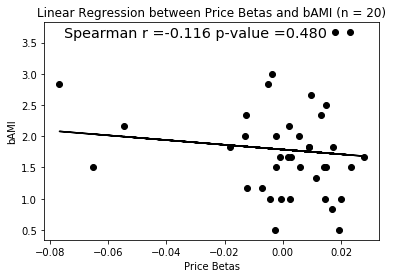

In [151]:
x = correlation_table['price_displayed']
y = correlation_table['bAMI']

slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
line = slope*x+intercept

plt.xlabel("Price Betas")
plt.ylabel("bAMI")

plt.plot(x,y,'o',x,line,color = 'black')
plt.title('Linear Regression between Price Betas and bAMI (n = 20)')
plt.annotate('Spearman r =-0.116 p-value =0.480', xy=(0.06, 0.93), xycoords='axes fraction', size = 'x-large')

plt.savefig('price_bAMI_v2.0.png', transparent=True, dpi=300)
#plt.scatter(x, y, linewidth=2, color='purple', linestyle='-', marker='o', label="y=x^2")

In [150]:
ss.spearmanr(x,y)

SpearmanrResult(correlation=-0.11649409857295343, pvalue=0.4800352235389955)

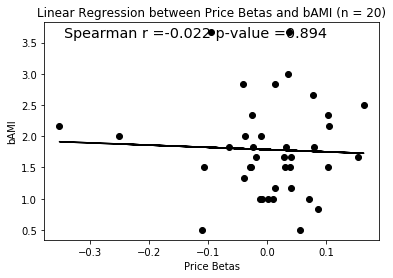

In [154]:
x = correlation_table['environment_binary[T.1]']
y = correlation_table['bAMI']

slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
line = slope*x+intercept

plt.xlabel("Price Betas")
plt.ylabel("bAMI")

plt.plot(x,y,'o',x,line,color = 'black')
plt.title('Linear Regression between Price Betas and bAMI (n = 20)')
plt.annotate('Spearman r =-0.022 p-value =0.894', xy=(0.06, 0.93), xycoords='axes fraction', size = 'x-large')

plt.savefig('price_bAMI_v2.0.png', transparent=True, dpi=300)
#plt.scatter(x, y, linewidth=2, color='purple', linestyle='-', marker='o', label="y=x^2")

In [153]:
ss.spearmanr(x,y)

SpearmanrResult(correlation=-0.022058655663465, pvalue=0.8939637369144926)